In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast

plt.rcParams.update({
    'figure.dpi': 600,
    'axes.labelsize': 30.0,
    'axes.titlesize': 30.0,
    'axes.labelweight': 'normal',
    'axes.linewidth': 1.25,
    'legend.fontsize': 25,
    'legend.title_fontsize': 18.0,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'lines.linewidth': 2.0,
    'lines.markersize': 6.0,
    'grid.color': '.8',
    'grid.linestyle': '-',
    'grid.linewidth': 1.0,
})

data_high   = pd.read_csv('/Users/simonhampp/Desktop/MA/swarm-rl/src/experiments_ma/7_generalizability/saved_experiments/1_high_variance_rollout.csv')
data_low    = pd.read_csv('/Users/simonhampp/Desktop/MA/swarm-rl/src/experiments_ma/7_generalizability/saved_experiments/1_low_variance_rollout.csv')
data_no     = pd.read_csv('/Users/simonhampp/Desktop/MA/swarm-rl/src/experiments_ma/7_generalizability/saved_experiments/1_no_variance_rollout.csv')

data_high['training_dataset'] = 'high_variance'
data_low['training_dataset']  = 'low_variance'
data_no['training_dataset']   = 'no_variance'

data_combined = pd.concat([data_high, data_low, data_no], ignore_index=True)
# data_combined = data_high
data_combined["rewards"] = data_combined["rewards"].apply(ast.literal_eval)
data_combined["rewards"] = data_combined["rewards"].apply(lambda outer: [np.mean(inner) for inner in outer])
data_combined = data_combined.explode('rewards')
data_combined['rewards'] = data_combined['rewards'].astype(float)

grouped = data_combined.groupby(['strategy', 'training_dataset', 'agents'])['rewards'].mean().reset_index()
grouped['train_agents'] = grouped['training_dataset'] + "_" + grouped['agents'].astype(str)

In [5]:
# Pivot the table
pivot = grouped.pivot(index='strategy', columns='train_agents', values='rewards')

# Reorder and rename the columns
original_columns = [
    'high_variance_5',
    'low_variance_5',
    'no_variance_5',
    'high_variance_10',
    'low_variance_10',
    'no_variance_10',
    'high_variance_20',
    'low_variance_20',
    'no_variance_20'
]
short_columns = [
    'high_5',
    'low_5',
    'no_5',
    'high_10',
    'low_10',
    'no_10',
    'high_20',
    'low_20',
    'no_20'
]
column_rename = dict(zip(original_columns, short_columns))

pivot = pivot[[col for col in original_columns if col in pivot.columns]]
pivot.rename(columns=column_rename, inplace=True)

# Reorder and rename the strategies
desired_index = [
    'concat', 'mlp', 'mlp_local', 'mlp_global',
    'graph_sage', 'graph_gat', 'graph_gat_v2',
    'set_transformer_inv', 'sab_transformer', 'isab_transformer'
]
strategy_rename = {
    'concat': 'CONCAT',
    'mlp': 'DS',
    'mlp_local': 'DS_LO',
    'mlp_global': 'DS_GL',
    'graph_sage': 'GSAGE',
    'graph_gat': 'GAT',
    'graph_gat_v2': 'GATv2',
    'set_transformer_inv': 'SET',
    'isab_transformer': 'ISAB',
    'sab_transformer': 'SAB',
}
pivot = pivot.reindex(desired_index)
pivot.rename(index=strategy_rename, inplace=True)

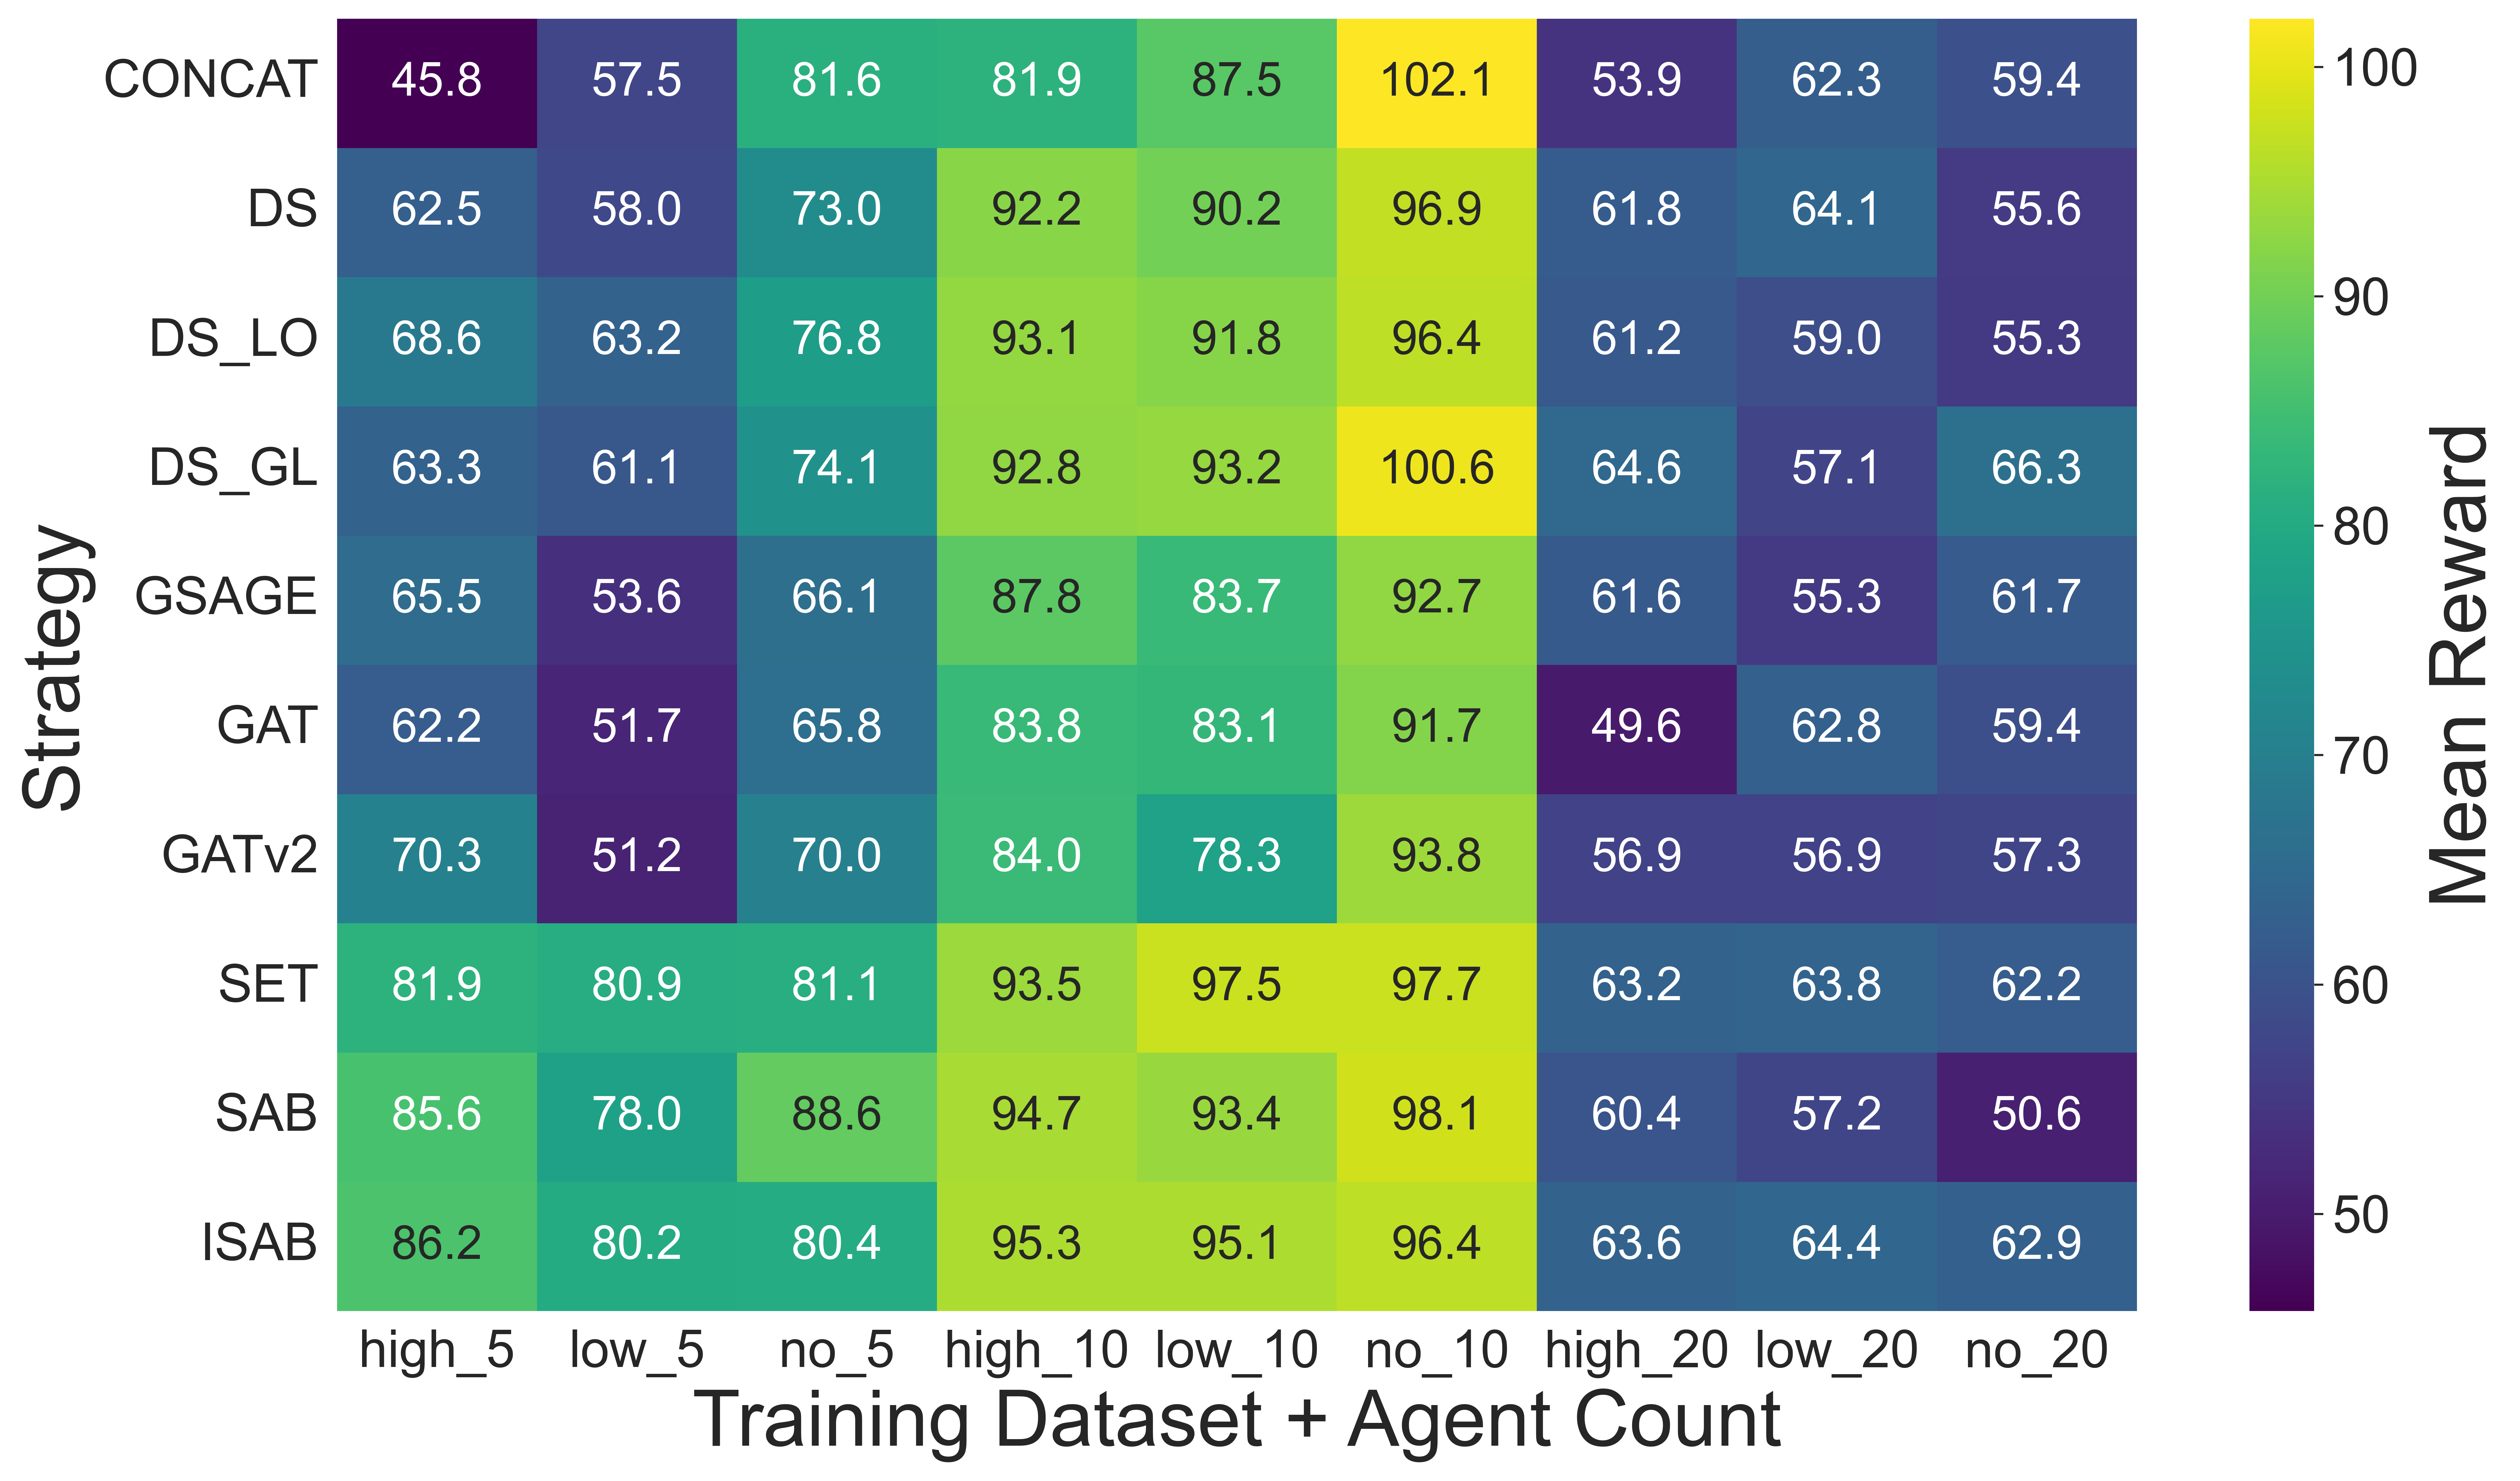

In [6]:
plt.figure(figsize=(14, 8))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="viridis", cbar_kws={'label': 'Mean Reward'}, annot_kws={"size": 18})
plt.xlabel("Training Dataset + Agent Count")
plt.ylabel("Strategy")
plt.tight_layout()
plt.show()